In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [ ]:

data=pd.read_csv('/content/data.csv')

In [ ]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text

In [ ]:
data.head()

,7/24/2024 13:02:34,Anushka Raut,20 to 25,Female,Hotstar,Kids,Movies
0,7/24/2024 13:05:31,Mohnish,20 to 25,Male,Netflix,Comedy,Movies
1,7/24/2024 13:10:56,Sexy Sarvesh,5 to 12,Male,Netflix,Kids,TV Series/ Web series
2,7/24/2024 13:11:21,Priya Deshmukh,20 to 25,Female,Netflix,Drama,Movies
3,7/24/2024 13:11:34,Jaimeen Jaan,50 and above,Prefer not to say,Youtube Premium,Romance,Sports
4,7/24/2024 13:12:56,Malhar Pawar,20 to 25,Male,Netflix,Action,TV Series/ Web series


In [ ]:
data.tail()

,7/24/2024 13:02:34,Anushka Raut,20 to 25,Female,Hotstar,Kids,Movies
94,7/24/2024 21:43:27,My mom is gay,26 to 30,Prefer not to say,ZEE5,Documentry,TV Series/ Web series
95,7/24/2024 21:48:38,pranay kumar,5 to 12,Male,Youtube Premium,Horror,TV Series/ Web series
96,7/24/2024 21:51:10,Ayaan Dwivedi,13 to 19,Male,Amazon Prime Video,Comedy,Movies
97,7/24/2024 21:52:24,Shweta Dwivedi,40 to 50,Female,Netflix,Drama,Movies
98,7/24/2024 21:53:03,Gourav Deivedi,40 to 50,Male,Netflix,Action,TV Series/ Web series


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   7/24/2024 13:02:34  99 non-null     object
 1   Anushka Raut        99 non-null     object
 2   20 to 25            99 non-null     object
 3   Female              99 non-null     object
 4   Hotstar             99 non-null     object
 5   Kids                99 non-null     object
 6   Movies              99 non-null     object
dtypes: object(7)
memory usage: 5.5+ KB


In [ ]:
data.isnull().sum()

,0
7/24/2024 13:02:34,0
Anushka Raut,0
20 to 25,0
Female,0
Hotstar,0
Kids,0
Movies,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.columns

Index(['7/24/2024 13:02:34', 'Anushka Raut', '20 to 25', 'Female', 'Hotstar',
       'Kids', 'Movies'],
      dtype='object')

In [ ]:
data['Gender:'].unique()

KeyError: 'Gender:'

In [ ]:
data['Gender:'].replace({'Male':0,'Female':1,'Prefer not to say':2},inplace=True)

KeyError: 'Gender:'

In [ ]:
data['Gender:'].unique()

In [ ]:
data.head(20)

In [ ]:
data['Which OTT do you prefer?'].unique()

In [ ]:
data['Which OTT do you prefer?'].replace({'Netflix':0,'Hotstar':1,'Youtube Premium':2,'Amazon Prime Video':3,'ZEE5':4,'Jiocinema':5,'Sony LIV':6},inplace=True)

KeyError: 'Which OTT do you prefer?'

In [ ]:
data['Which OTT do you prefer?'].unique()

In [ ]:
data['Preferred Genres'].unique()

In [ ]:
data['Preferred Genres'].replace({'Kids':0, 'Comedy':1, 'Drama':2, 'Romance':3, 'Action':4, 'Horror':5, 'Sci-Fi':6,'Animation':7, 'Documentry':8},inplace=True)

KeyError: 'Preferred Genres'

In [ ]:
data['Categories:'].unique()

In [ ]:
data['Categories:'].replace({'Movies':0,'TV Series/ Web series':1,'Sports':2},inplace=True)

In [ ]:
data=data.drop(['Timestamp'],axis=1)

KeyError: "['Timestamp'] not found in axis"

**Graph**

In [ ]:
sns.histplot(data['Age:'])
plt.tight_layout()

KeyError: 'Age:'

ValueError: Could not interpret value `Age:` for `x`. An entry with this name does not appear in `data`.

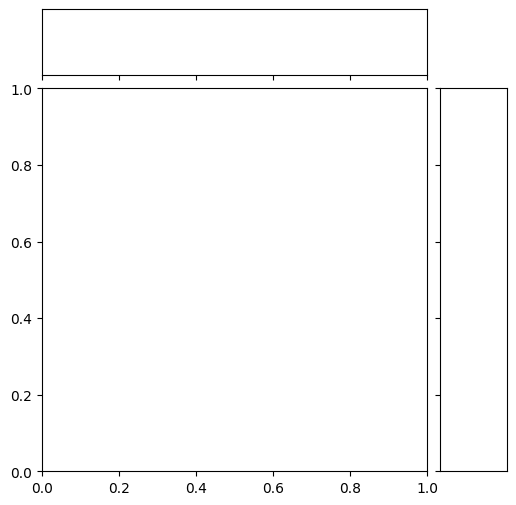

In [ ]:

sns.jointplot(x='Age:',y='Gender:',data=data)
plt.tight_layout()

In [ ]:
sns.barplot(x='Gender:', y='Which OTT do you prefer?', data=data)

In [ ]:
sns.boxplot(x='Age:', y='Gender:', data=data)
plt.tight_layout()


In [ ]:
sns.scatterplot(x= 'Gender:', y= 'Which OTT do you prefer?', data=data)
plt.tight_layout()


ValueError: Could not interpret value `Gender:` for `x`. An entry with this name does not appear in `data`.

In [ ]:
sns.pairplot(data)
plt.tight_layout()

In [ ]:
sns.violinplot(x='Age:', y='Preferred Genres', data=data)
plt.tight_layout()

ValueError: Could not interpret value `Age:` for `x`. An entry with this name does not appear in `data`.

**Heatmap**

In [ ]:
g = data.drop(columns=['Name :', 'Age:'], axis=1)
heatmap = g.corr()
sns.heatmap(heatmap, annot=True)

KeyError: "['Name :', 'Age:'] not found in axis"

**KNN classifier model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [ ]:
X = data[['Gender:', 'Preferred Genres', 'Categories:']]
y = data['Which OTT do you prefer?']


KeyError: "None of [Index(['Gender:', 'Preferred Genres', 'Categories:'], dtype='object')] are in the [columns]"

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.4690265486725664
Confusion Matrix:
 [[45  0  1  0  0  2  0]
 [10  0  1  0  0  1  0]
 [ 3  0  1  3  0  1  0]
 [19  0  0  0  1  0  0]
 [ 4  0  0  0  5  0  0]
 [11  0  0  0  1  1  0]
 [ 1  0  0  1  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.94      0.64        48
           1       0.00      0.00      0.00        12
           2       0.33      0.12      0.18         8
           3       0.00      0.00      0.00        20
           4       0.71      0.56      0.63         9
           5       0.20      0.08      0.11        13
           6       1.00      0.33      0.50         3

    accuracy                           0.47       113
   macro avg       0.39      0.29      0.29       113
weighted avg       0.34      0.47      0.36       113



**Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.4247787610619469
Confusion Matrix:
 [[48  0  0  0  0  0  0]
 [12  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [20  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [13  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.60        48
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         3

    accuracy                           0.42       113
   macro avg       0.06      0.14      0.09       113
weighted avg       0.18      0.42      0.25       113



**SVM classifier**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
clf = SVC(kernel='linear', C=1.0)


In [ ]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.60        48
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        20
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        13
           6       0.00      0.00      0.00         3

    accuracy                           0.42       113
   macro avg       0.06      0.14      0.09       113
weighted avg       0.18      0.42      0.25       113

